# 1. Read the superstore.csv file into a data frame

In [91]:
import pandas as pd

superstore_df = pd.read_csv('superstore(1).csv')

# 2. Show the head of the data frame

In [92]:
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 3. List the top 10 customers who generated the most total profit. also show which segment they belong to

In [111]:

superstore_df['Profit'] = superstore_df['Profit']   
top_ten_profits = pd.DataFrame(superstore_df.groupby(['Customer Name','Segment'])['Profit'].sum())
top_ten = top_ten_profits.sort_values('Profit', ascending=False).head(10)
top_ten

,,Profit
Customer Name,Segment,
Tamara Chand,Corporate,8981.3239
Raymond Buch,Consumer,6976.0959
Sanjit Chand,Consumer,5757.4119
Hunter Lopez,Consumer,5622.4292
Adrian Barton,Consumer,5444.8055
Tom Ashbrook,Home Office,4703.7883
Christopher Martinez,Consumer,3899.8904
Keith Dawkins,Corporate,3038.6254
Andy Reiter,Consumer,2884.6208


# 4. Create a bar chart of the top 10 most profitable customers

<AxesSubplot:xlabel='Customer Name'>

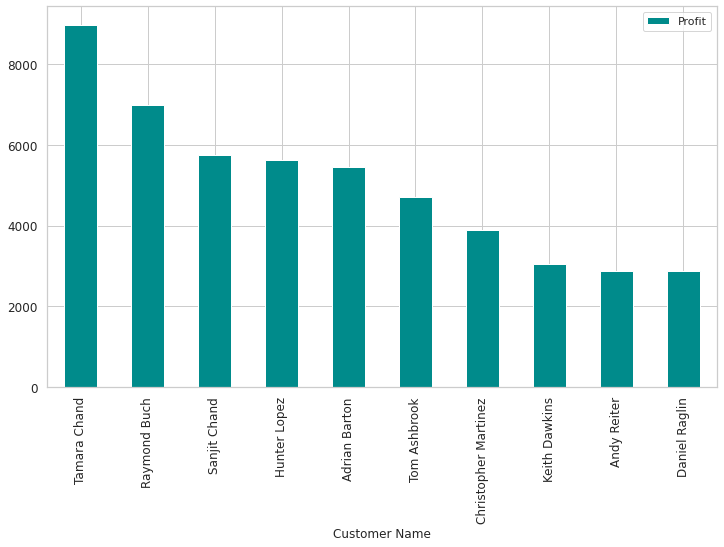

In [264]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

top_ten_profits = pd.DataFrame(superstore_df.groupby('Customer Name')['Profit'].sum())
top_ten = top_ten_profits.sort_values('Profit', ascending=False).head(10)
top_ten['Customer Name'] = top_ten.index
top_ten['Segment'] = top_ten.index

top_ten.plot(x="Customer Name", y="Profit", kind="bar", rot=90, fontsize=12, color = ['darkcyan'], figsize = (12,7))

# 5. Using seaborn, create a horizontal bar chart of the 10 most profitable customers, coloured by segment

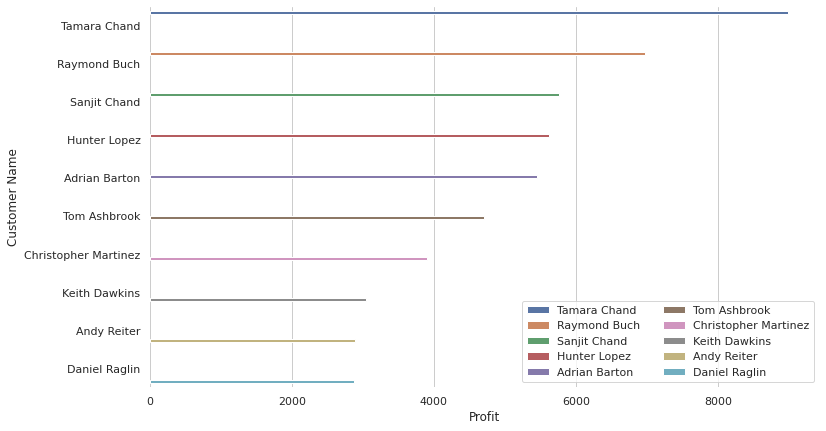

In [265]:
import seaborn as sns

import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 7))

sns.barplot(x="Profit", y="Customer Name", data=top_ten, hue = "Segment")

sns.despine(left=True, bottom=True)

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

# 6. Display a list of the 10 products which generated the least profit (or in this case, the biggest losses).

In [205]:
superstore_df['Profit'] = superstore_df['Profit']   
top_ten_losses = pd.DataFrame(superstore_df.groupby(['Product Name'])['Profit'].sum())
last_ten = top_ten_losses.sort_values('Profit', ascending=True).head(10)
last_ten

,Profit
Product Name,
Cubify CubeX 3D Printer Double Head Print,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
Bush Advantage Collection Racetrack Conference Table,-1934.3976
GBC DocuBind P400 Electric Binding System,-1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit,-1811.0784
Martin Yale Chadless Opener Electric Letter Opener,-1299.1836
Balt Solid Wood Round Tables,-1201.0581


# 7. List the products which were ordered the most (they appeared on the most orders)

In [206]:
superstore_df.groupby('Product Name')['Product Name'].count().nlargest(30)


Product Name
Staple envelope                                               48
Easy-staple paper                                             46
Staples                                                       46
Avery Non-Stick Binders                                       20
Staples in misc. colors                                       19
KI Adjustable-Height Table                                    18
Staple remover                                                18
Storex Dura Pro Binders                                       17
Staple-based wall hangings                                    16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     15
Situations Contoured Folding Chairs, 4/Set                    15
Eldon Wave Desk Accessories                                   14
GBC Premium Transparent Covers with Diagonal Lined Pattern    14
Global High-Back Leather Tilter, Burgundy                     14
Global Wood Trimmed Manager's Task Chair, Khaki               14
ACCOHIDE 3-R

# 8. Create a bar chart which shows the total profit for each product sub-category

<AxesSubplot:xlabel='Sub-Category'>

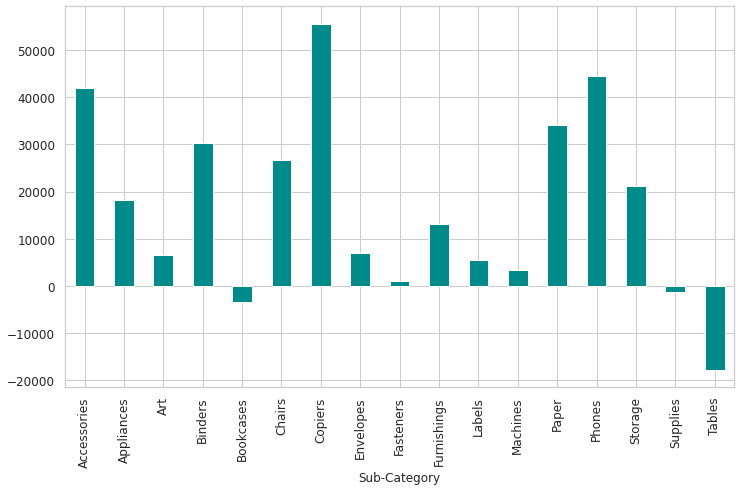

In [207]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

superstore_df['Profit'] = superstore_df['Profit'] 

superstore_df.reset_index(level=0, drop=True,inplace=True)
sub_category_profits = superstore_df.groupby('Sub-Category')['Profit'].sum()

sub_category_profits.plot(x="Sub-Category", y="Profit", kind="bar", rot=90, fontsize=12, color = ['darkcyan'], figsize = (12,7))


# 9. Create a scatter chart which plots the sales against the profits and colours them by sub-category

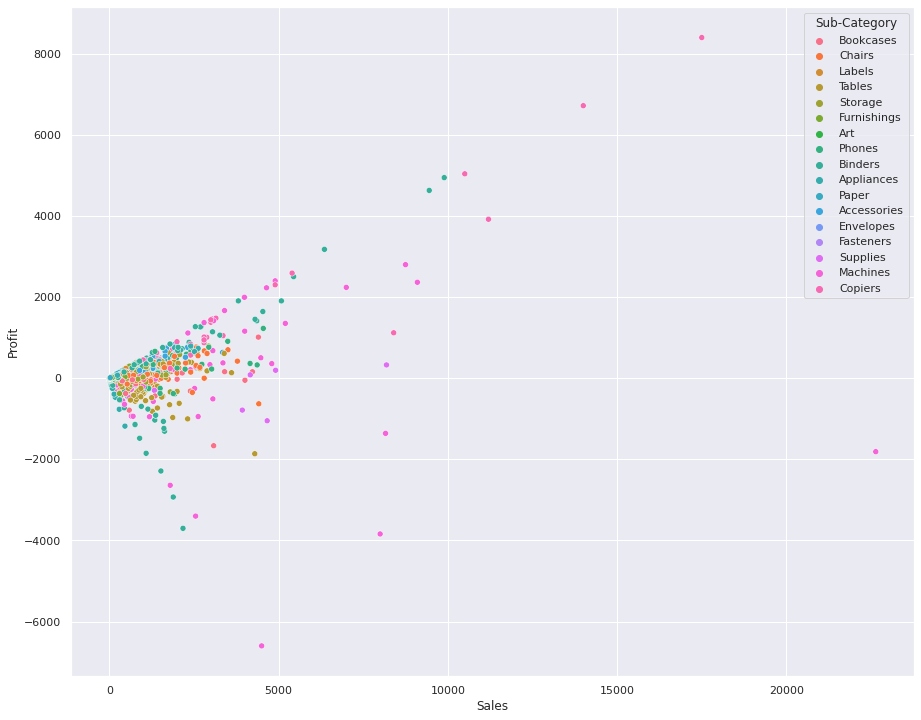

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(rc={'figure.figsize':(15.11,12.31)})
sns.scatterplot(data = superstore_df, x = "Sales", y = "Profit", hue='Sub-Category')

plt.show()


# 11. List the top 15 products in terms of total Quantity ordered

In [209]:

superstore_df.groupby('Product Name')['Quantity'].sum().nlargest(15)

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Chromcraft Round Conference Tables                             61
Eldon Wave Desk Accessories                                    61
Staple remover                                                 61
Global Wood Trimmed Manager's Task Chair, Khaki                59
Wilson Jones Turn Tabs Binder Tool for Ring Binders            

# 12. Create a pie chart of the top 5 products in terms of quantity ordered

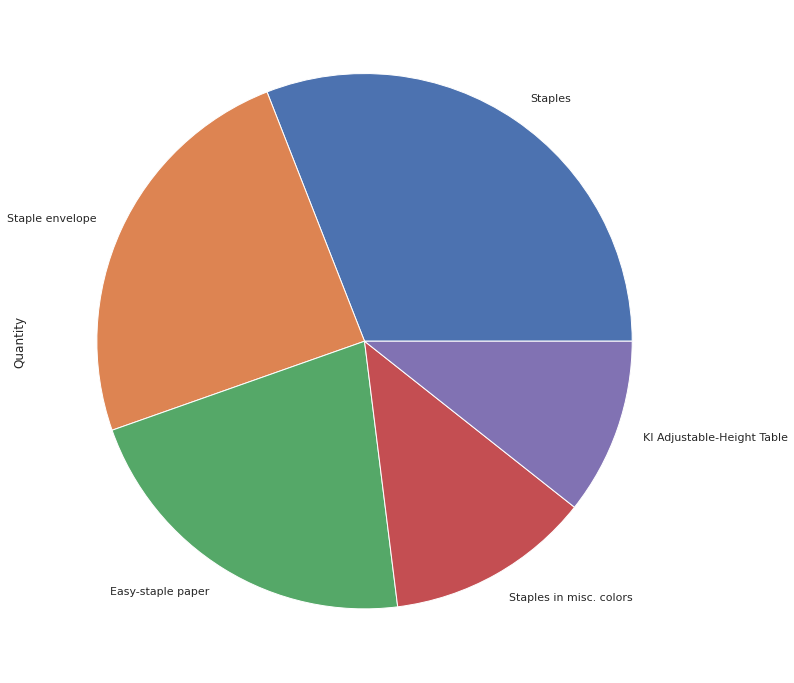

In [211]:
top_5 = superstore_df.groupby(['Product Name'])['Quantity'].sum().nlargest(5).plot(kind='pie', y='Qty')


# 13. Show the total profit for each state, illustrating deficits and profits using different colours

### Hint: Add a column which shows whether Profit is less than zero, and use that as the hue

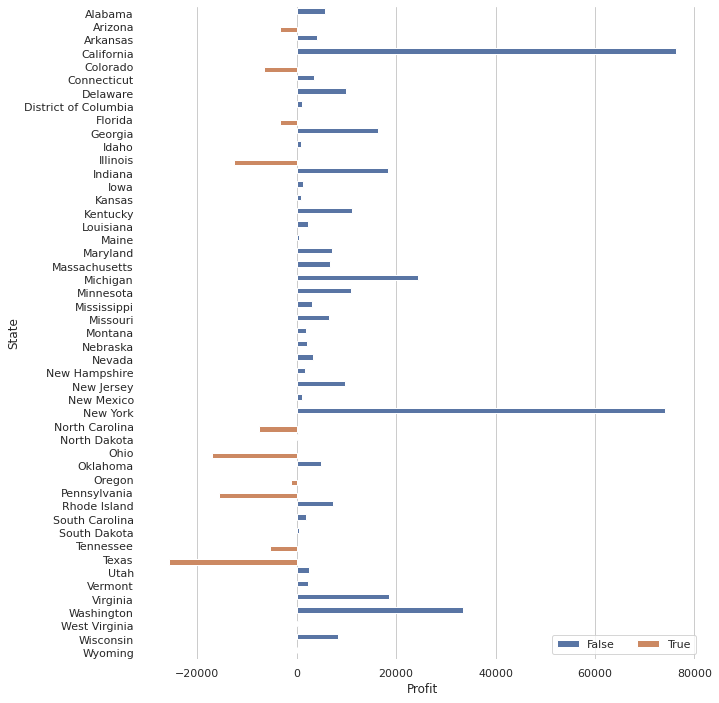

In [212]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

superstore_df = pd.read_csv('superstore(1).csv')


sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 12))


total_profit = superstore_df.groupby(['State'])['Profit'].sum()
total = pd.DataFrame(total_profit)
total['Hue_Status'] = total['Profit']<(0)
total['State'] = total.index
sns.barplot(x="Profit", y="State", data=total, hue = "Hue_Status")

sns.despine(left=True, bottom=True)

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)